## Importar librerias

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np#Linear Algebra
import seaborn as sns#visualization
import matplotlib.pyplot as plt#visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
import plotly.offline as py
%pylab inline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Cargar datos

In [56]:
df = pd.read_excel('./BD-diabetes-Pima.xlsx',sheet_name="Muestra") 
df.drop('n', axis=1, inplace=True)


In [57]:
df.head()

,n_ENBARAZOS,GLUCOSA,PRESION_SANGUINEA,GROSOR_DE_PIEL,INSULINA,BMI,DiabetesPedigreeFunction,EDAD,Outcome
0,6,103,72,32,190,37.7,0.324,55,0
1,7,103,66,32,0,39.1,0.344,31,1
2,1,119,44,47,63,35.5,0.280,25,0
3,0,93,60,25,92,28.7,0.532,22,0
4,1,126,56,29,152,28.7,0.801,21,0


## Analisis Exploratorio

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_ENBARAZOS,680.0,3.895588,3.403106,0.000,1.00000,3.000,6.000,17.00
GLUCOSA,680.0,119.608824,33.680819,0.000,99.00000,117.000,140.000,199.00
PRESION_SANGUINEA,680.0,72.300000,11.875322,24.000,64.00000,72.000,80.000,114.00
GROSOR_DE_PIEL,680.0,22.385294,15.705175,0.000,10.00000,25.000,33.000,99.00
INSULINA,680.0,82.277941,114.270217,0.000,0.00000,42.500,130.000,680.00
BMI,680.0,32.508971,7.463551,0.000,27.70000,32.200,37.200,59.40
DiabetesPedigreeFunction,680.0,0.489062,0.351372,0.078,0.24675,0.388,0.654,2.42
EDAD,680.0,33.598529,11.950154,21.000,24.00000,29.000,41.000,69.00
Outcome,680.0,0.341176,0.474454,0.000,0.00000,0.000,1.000,1.00


In [59]:
df.isnull().sum()

n_ENBARAZOS                 0
GLUCOSA                     0
PRESION_SANGUINEA           0
GROSOR_DE_PIEL              0
INSULINA                    0
BMI                         0
DiabetesPedigreeFunction    0
EDAD                        0
Outcome                     0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   n_ENBARAZOS               680 non-null    int64  
 1   GLUCOSA                   680 non-null    int64  
 2   PRESION_SANGUINEA         680 non-null    int64  
 3   GROSOR_DE_PIEL            680 non-null    int64  
 4   INSULINA                  680 non-null    int64  
 5   BMI                       680 non-null    float64
 6   DiabetesPedigreeFunction  680 non-null    float64
 7   EDAD                      680 non-null    int64  
 8   Outcome                   680 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 47.9 KB


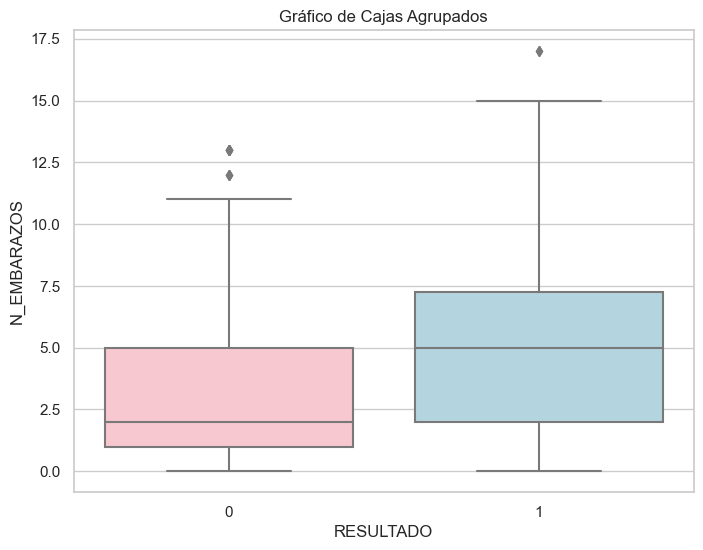

In [91]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de cajas agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="n_ENBARAZOS", data=df,palette=["pink", "lightblue"])

# Añadir etiquetas a los ejes
plt.xlabel("RESULTADO")
plt.ylabel("N_EMBARAZOS")
plt.title("Gráfico de Cajas Agrupados")

# Mostrar el gráfico
plt.show()

### Graficos de cajas

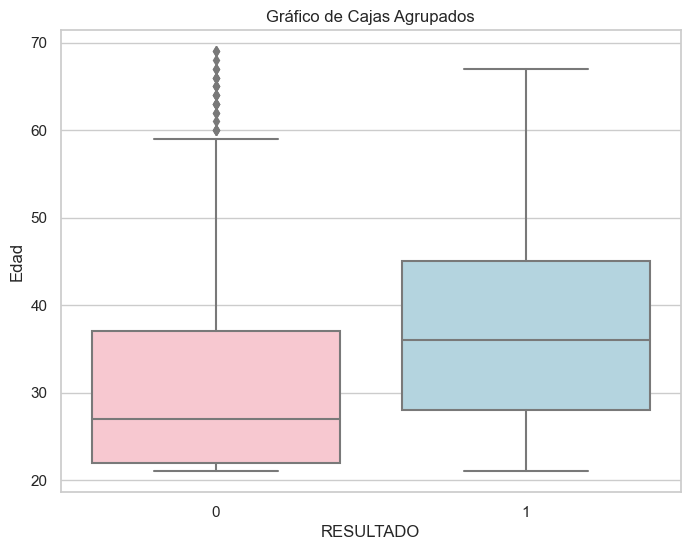

In [90]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de cajas agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="EDAD", data=df,palette=["pink", "lightblue"])

# Añadir etiquetas a los ejes
plt.xlabel("RESULTADO")
plt.ylabel("Edad")
plt.title("Gráfico de Cajas Agrupados")

# Mostrar el gráfico
plt.show()

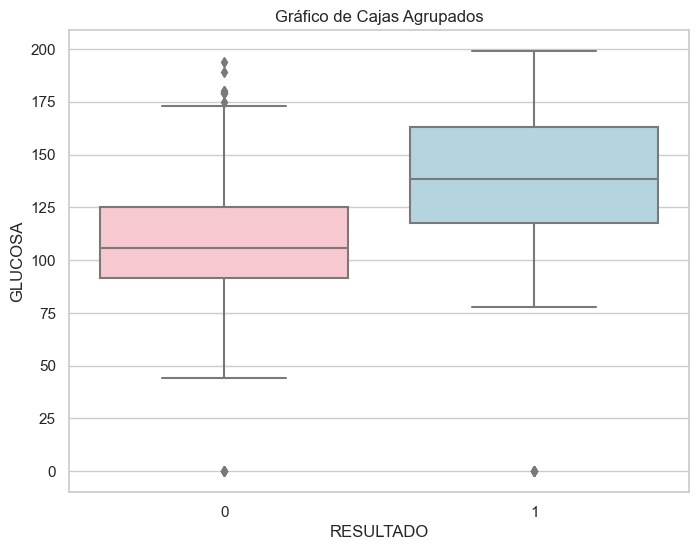

In [95]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de cajas agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="GLUCOSA", data=df,palette=["pink", "lightblue"])

# Añadir etiquetas a los ejes
plt.xlabel("RESULTADO")
plt.ylabel("GLUCOSA")
plt.title("Gráfico de Cajas Agrupados")

# Mostrar el gráfico
plt.show()

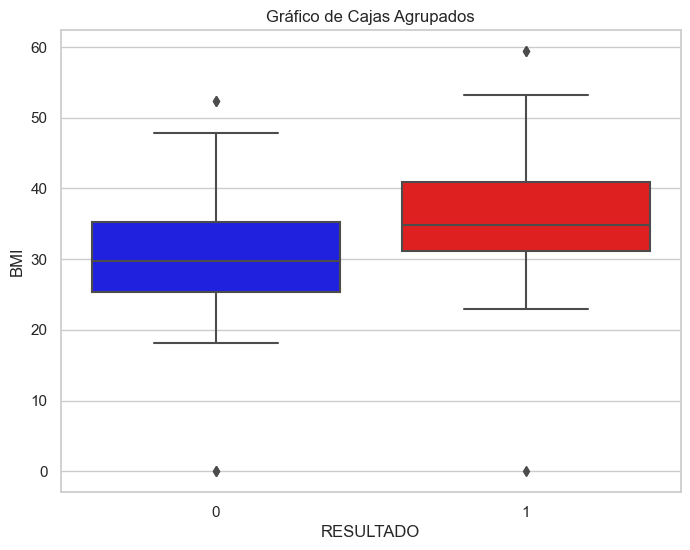

In [96]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de cajas agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="BMI", data=df,palette=["blue", "red"])

# Añadir etiquetas a los ejes
plt.xlabel("RESULTADO")
plt.ylabel("BMI")
plt.title("Gráfico de Cajas Agrupados")

# Mostrar el gráfico
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

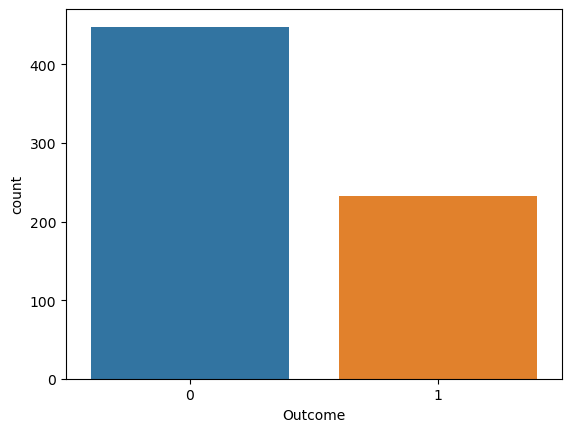

In [62]:
sns.countplot(x=df.Outcome)

## Regresion logistica (logit)

In [118]:
import statsmodels.formula.api as sm
# Aplicar el modelo de regresión logística con todas las variables independientes
modelo_logit = sm.logit(formula="Outcome ~ EDAD + PRESION_SANGUINEA + GROSOR_DE_PIEL + INSULINA + DiabetesPedigreeFunction+n_ENBARAZOS+GLUCOSA+BMI", data=df).fit()

# Obtener los resultados del modelo
print(modelo_logit.summary())

Optimization terminated successfully.
         Current function value: 0.476841
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  680
Model:                          Logit   Df Residuals:                      671
Method:                           MLE   Df Model:                            8
Date:                Fri, 21 Jul 2023   Pseudo R-squ.:                  0.2570
Time:                        16:54:44   Log-Likelihood:                -324.25
converged:                       True   LL-Null:                       -436.43
Covariance Type:            nonrobust   LLR p-value:                 4.612e-44
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.3665      0.856    -10.945      0.000     -11.044

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
# Separar las variables independientes y dependientes
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=680)

# Ajustar el modelo de regresión logística
modelo_logit = LogisticRegression()
modelo_logit.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_logit.predict(X_test)

# Crear la tabla de clasificación (matriz de confusión)
tabla_clasificacion = confusion_matrix(y_test, predicciones)
accuracy = accuracy_score(y_test, predicciones)

# Mostrar la tabla de clasificación y el porcentaje global de clasificación correcta
print("Tabla de clasificación:")
print(tabla_clasificacion)
print("\nPorcentaje global de clasificación correcta: {:.1f}%".format(accuracy * 100))


Tabla de clasificación:
[[83 13]
 [20 20]]

Porcentaje global de clasificación correcta: 75.7%


## Calcular VIF

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable independiente
vif = pd.DataFrame()
vif['Variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print(vif)

                  Variables        VIF
0                     const  50.999859
1               n_ENBARAZOS   1.520604
2                   GLUCOSA   1.295090
3         PRESION_SANGUINEA   1.308152
4            GROSOR_DE_PIEL   1.442980
5                  INSULINA   1.388534
6                       BMI   1.342083
7  DiabetesPedigreeFunction   1.067626
8                      EDAD   1.706892


## Analisis de correlacion de pearson

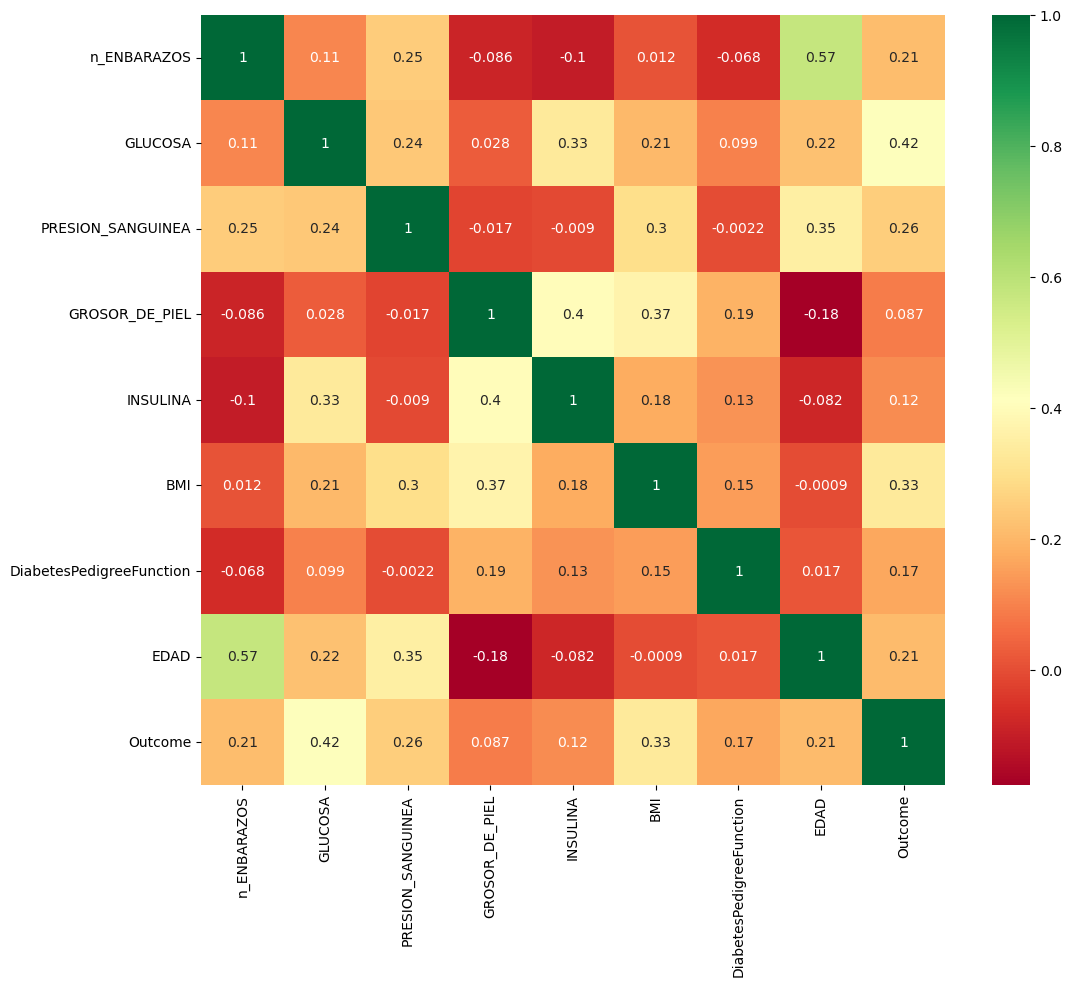

In [64]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [65]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['n_ENBARAZOS', 'GLUCOSA', 'PRESION_SANGUINEA', 'GROSOR_DE_PIEL', 'INSULINA',
       'BMI', 'DiabetesPedigreeFunction', 'EDAD'])

In [66]:
X.head()

,n_ENBARAZOS,GLUCOSA,PRESION_SANGUINEA,GROSOR_DE_PIEL,INSULINA,BMI,DiabetesPedigreeFunction,EDAD
0,0.618835,-0.493487,-0.025281,0.612651,0.943390,0.696029,-0.470109,1.792213
1,0.912900,-0.493487,-0.530902,0.612651,-0.720560,0.883746,-0.413147,-0.217607
2,-0.851493,-0.018090,-2.384848,1.568453,-0.168829,0.401047,-0.595424,-0.720063
3,-1.145558,-0.790611,-1.036524,0.166609,0.085142,-0.510719,0.122291,-0.971290
4,-0.851493,0.189897,-1.373605,0.421490,0.610600,-0.510719,0.888424,-1.055033


In [67]:
y = df.Outcome

In [68]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [69]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [70]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [71]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 82.81938325991189 % and k = [1]


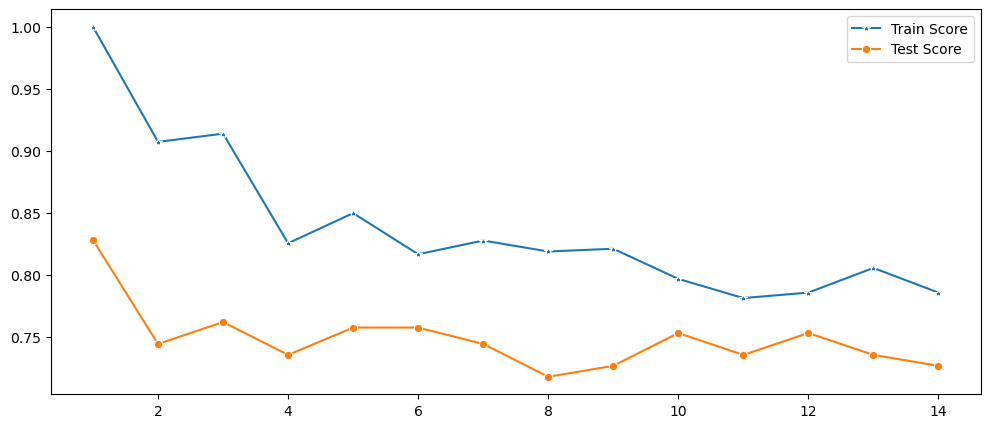

In [72]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [75]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8281938325991189

## Analizar el modelo

In [76]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,126,24,150
1,15,62,77
All,141,86,227


Text(0.5, 23.52222222222222, 'Predicted label')

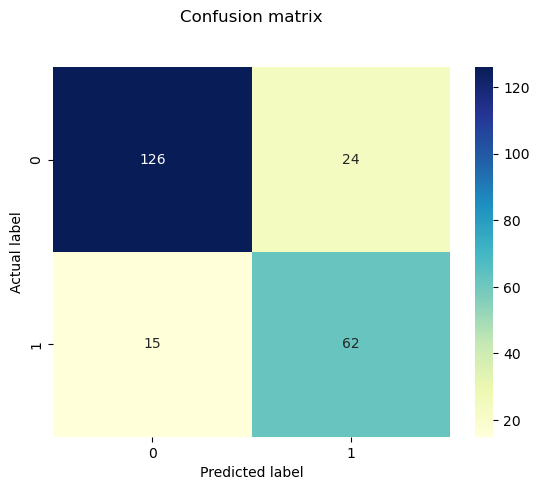

In [77]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       150
           1       0.72      0.81      0.76        77

    accuracy                           0.83       227
   macro avg       0.81      0.82      0.81       227
weighted avg       0.84      0.83      0.83       227



# ROC

In [79]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

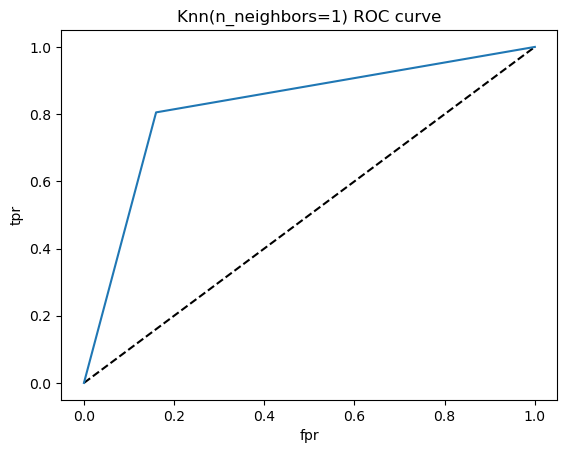

In [84]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

In [82]:
#Area bajo la curva ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8225974025974025

In [83]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.85
Best Parameters: {'n_neighbors': 1}
